![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

### Content:
1. [Objectives](#Objectives)
2. [Data Exploration and Cleaning](#Data-Exploration-and-Cleaning)
3. [Perform Key Analysis](#Perform-Key-Analysis)

### Objectives

#### Identify the Top Performing Schools
- **Objective**: Find schools with the highest SAT math, reading, and writing scores.
- **Why?**: This will highlight excellence and can inform educational policymakers or parents about where students are excelling.
- **How to measure success**: Use sorting and filtering techniques to isolate top performers by individual subject scores and total SAT scores.

#### Analyze Performance Variation Across Boroughs
- **Objective**: Compare test scores across NYC boroughs to understand if there are significant differences in performance.
- **Why?**: This can reveal regional disparities and help target areas that may require more resources or attention.
- **How to measure success**: Calculate average SAT scores per borough, along with the standard deviation to show consistency or variability in test performance.

#### Find the Top 10 Performing Schools
- **Objective**: Rank the top 10 schools based on total SAT score (math + reading + writing).
- **Why?**: This provides a clear snapshot of the highest overall academic performance across schools.
- **How to measure success**: Use aggregated data to compute total scores and then rank the schools in descending order.

#### Analyze Subject-Specific Strengths and Weaknesses
- **Objective**: Determine which schools excel in specific subjects (math, reading, writing) versus overall performance.
- **Why?**: Understanding subject-specific strengths can inform curriculum improvements or tutoring focus areas.
- **How to measure success**: Visualize performance across different subjects for the top schools and compare them.

### Data Exploration and Cleaning

#### Load and Inspect the Data

In [1]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

In [2]:
# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [3]:
# Check column names and data types
schools.dtypes

school_name         object
borough             object
building_code       object
average_math         int64
average_reading      int64
average_writing      int64
percent_tested     float64
dtype: object

In [4]:
# Get basic summary statistics
schools.describe()

,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


In [5]:
# Check for missing values
schools.isnull().sum()

school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64

In [6]:
# Check for duplicate data
schools.duplicated().sum()

0

In [7]:
import matplotlib.pyplot as plt

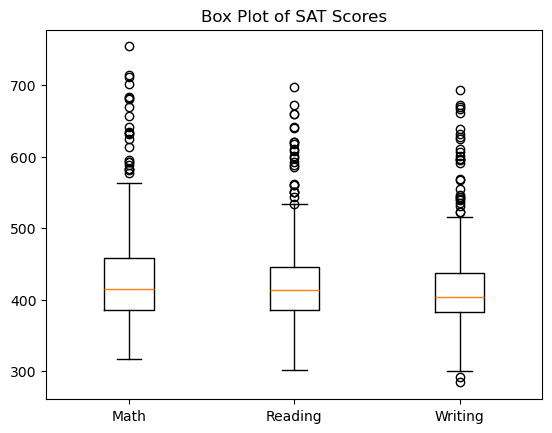

In [8]:
# Visualize outliers using a boxplot
plt.boxplot([schools["average_math"], schools["average_reading"], schools["average_writing"]])
plt.title("Box Plot of SAT Scores")
plt.xticks([1, 2, 3], ["Math", "Reading", "Writing"])
plt.show()

#### Feature Engineering

In [9]:
# Add a new column for the total_scores for all subjects.
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197


### Perform Key Analysis

#### Identify Top-Performing Schools
##### Top performing in each subject

In [10]:
# Math.

best_math_schools = schools[schools["average_math"] >= (800*80/100)].sort_values(by="average_math", ascending=False)[["school_name", "average_math"]]
# best_math_schools

schools.sort_values(by="average_math", ascending=False)[["school_name", "borough", "average_math"]].head(10)

,school_name,borough,average_math
88,Stuyvesant High School,Manhattan,754
170,Bronx High School of Science,Bronx,714
93,Staten Island Technical High School,Staten Island,711
365,Queens High School for the Sciences at York Co...,Queens,701
68,"High School for Mathematics, Science, and Engi...",Manhattan,683
280,Brooklyn Technical High School,Brooklyn,682
333,Townsend Harris High School,Queens,680
174,High School of American Studies at Lehman College,Bronx,669
0,"New Explorations into Science, Technology and ...",Manhattan,657
45,Eleanor Roosevelt High School,Manhattan,641


In [11]:
# Reading.

schools.sort_values(by="average_reading", ascending=False)[["school_name", "borough", "average_reading"]].head(10)

,school_name,borough,average_reading
88,Stuyvesant High School,Manhattan,697
174,High School of American Studies at Lehman College,Bronx,672
170,Bronx High School of Science,Bronx,660
93,Staten Island Technical High School,Staten Island,660
5,Bard High School Early College,Manhattan,641
333,Townsend Harris High School,Queens,640
365,Queens High School for the Sciences at York Co...,Queens,621
213,Baccalaureate School for Global Education,Queens,620
45,Eleanor Roosevelt High School,Manhattan,617
68,"High School for Mathematics, Science, and Engi...",Manhattan,610


In [12]:
# Writing.

schools.sort_values(by="average_writing", ascending=False)[["school_name", "borough", "average_writing"]].head(10)

,school_name,borough,average_writing
88,Stuyvesant High School,Manhattan,693
174,High School of American Studies at Lehman College,Bronx,672
93,Staten Island Technical High School,Staten Island,670
170,Bronx High School of Science,Bronx,667
333,Townsend Harris High School,Queens,661
5,Bard High School Early College,Manhattan,639
45,Eleanor Roosevelt High School,Manhattan,631
213,Baccalaureate School for Global Education,Queens,628
365,Queens High School for the Sciences at York Co...,Queens,625
204,Bard High School Early College Queens,Queens,610


In [13]:
# Top-performing by total_average_scores
top_10_schools = schools.sort_values(by="total_SAT", ascending=False)[["school_name", "total_SAT"]].head(10)
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


#### Analyze Borough Performance

In [15]:
# Group by borough and calculate the average SAT scores
schools.groupby("borough").mean(numeric_only=True)[["average_math", "average_reading", "average_writing"]].round(2)

,average_math,average_reading,average_writing
borough,,,
Bronx,404.36,402.52,395.85
Brooklyn,416.40,410.76,403.09
Manhattan,455.89,444.93,439.31
Queens,462.36,443.26,439.86
Staten Island,486.20,478.50,474.30


In [105]:
# Which single borough has the largest standard deviation in the combined SAT score
largest_std_dev = schools.groupby("borough").agg(
    num_schools = ("school_name", "count"),
    average_SAT = ("total_SAT", "mean"),
    std_SAT = ("total_SAT", "std")
).sort_values("std_SAT", ascending=False).round(2).head(1)
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29
